In [2]:
import pandas as pd


df = pd.read_csv('dataset_Facebook.csv', delimiter=';')

In [3]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
df['like'].mean()

177.94589178356713

In [5]:
df['like'].hist()

Paid vs Unpaid

In [6]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [7]:
# Paid
df[df['Paid'] == 1]['like'].mean()

235.6474820143885

In [8]:
# UnPaid
df[df['Paid'] == 0]['like'].mean()

155.84679665738162

In [9]:
df[df['Paid'] == 1]['like'].hist()

In [10]:
df[df['Paid'] == 0]['like'].hist()

The Central Limit Theorem (CLT) is a statistical theory states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.

I'm going to take 1000 samples of size 30 

In [11]:
df[df['Paid'] == 1]['like'].sample(n=30).mean()

164.3

In [35]:
paid = []
for i in range(1000):
    paid.append(df[df['Paid'] == 1]['like'].sample(n=30, replace = True).mean())

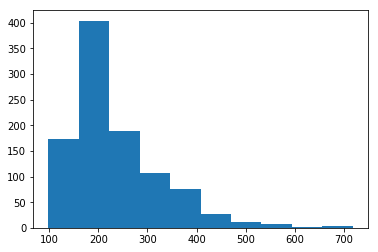

In [39]:
import matplotlib.pyplot as plt
plt.hist(paid)
plt.show()

In [40]:
np.mean(paid)

236.6381

In [41]:
unpaid = []
for i in range(1000):
    unpaid.append(df[df['Paid'] == 0]['like'].sample(n=30, replace = True).mean())

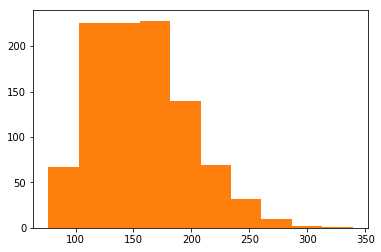

In [43]:
plt.hist(unpaid)
plt.show()

In [44]:
df['like'].describe()

count     499.000000
mean      177.945892
std       323.398742
min         0.000000
25%        56.500000
50%       101.000000
75%       187.500000
max      5172.000000
Name: like, dtype: float64

In [45]:
np.mean(unpaid)

156.34332947454843

We have demonstrated how we can use the central limit theorem.  But now how do we use this knowledge.  I'm now going to use this resampling technique to do a hypothesis test to see if there is a difference between the number of likes paid vs unpaid

In [46]:
df[df['Paid'] == 1]['like'].mean() - df[df['Paid'] == 0]['like'].mean()

79.80068535700687

What we are going to do is take random samples of likes and see what percent of the time the difference is greater than 79.8.  If the percent of times that the difference between the 2 random samples is less than 5%, we can say that there is a good chance a difference of this much did not happen by chance.  If we took random samples of this data and got an average difference of this much, we wouldn't say that was very impressive that we got a difference of 79.8

In [20]:
len(df.index)/2

250.0

In [30]:
sample_1 = df['like'].sample(250)
sample_2 = df.drop(sample_1.index)['like']

In [31]:
import numpy as np

In [32]:
np.mean(sample_1) - np.mean(sample_2)

-8.516851405622504

In [33]:
my_diffs = []
for i in range(10000):
    sample_1 = df['like'].sample(250)
    sample_2 = df.drop(sample_1.index)['like']
    diff = np.mean(sample_1) - np.mean(sample_2)
    my_diffs.append(diff)

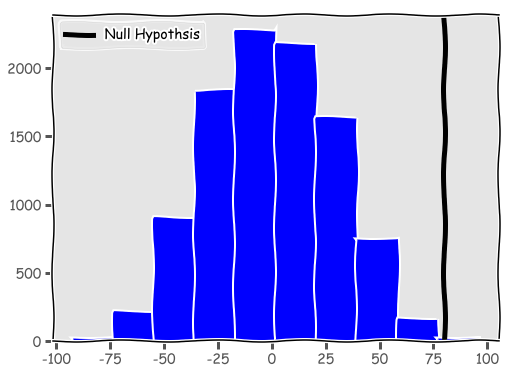

In [49]:
plt.style.use('ggplot')
plt.xkcd()
avg_diff = df[df['Paid'] == 1]['like'].mean() - df[df['Paid'] == 0]['like'].mean()
fig = plt.figure(figsize = (8, 6))
plt.hist(my_diffs, color = 'b')
plt.axvline(avg_diff, color = 'k', label = 'Null Hypothsis', linewidth = 5)
plt.legend()
plt.show()

In [51]:
my_count = 0
for indv_diff in my_diffs:
    if indv_diff > avg_diff:
        my_count += 1

In [52]:
my_count / 10000

0.0015